In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading data
data = pd.read_csv("movie_cost_revenue_dirty.csv")

In [3]:
data.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [4]:
data.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production Budget ($)',
       'Worldwide Gross ($)', 'Domestic Gross ($)'],
      dtype='object')

In [5]:
df = data.drop(['Rank','Release Date','Movie Title','Domestic Gross ($)'],axis=1)

In [6]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
Production Budget ($)    5391 non-null object
Worldwide Gross ($)      5391 non-null object
dtypes: object(2)
memory usage: 42.2+ KB


In [8]:
#convert to float dtype
df[df.columns[:]] = df[df.columns[:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
Production Budget ($)    5391 non-null float64
Worldwide Gross ($)      5391 non-null float64
dtypes: float64(2)
memory usage: 84.3 KB


In [10]:
df.head()

,Production Budget ($),Worldwide Gross ($)
0,110000.0,11000000.0
1,385907.0,0.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0


In [11]:
#remove whose Gross == 0 
df = df[df['Worldwide Gross ($)']!=0]

In [12]:
#check for worldwide gross == 0
df[df['Worldwide Gross ($)']==0]

,Production Budget ($),Worldwide Gross ($)


In [13]:
#change column name
df.columns = ['production_budget_usd','worldwide_gross_usd']

In [14]:
df.columns

Index(['production_budget_usd', 'worldwide_gross_usd'], dtype='object')

In [15]:
#saving clean data
df.to_csv('movie revenue.csv',index=False)

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline 

In [18]:
data = pd.read_csv('movie revenue.csv')
data.head()

,production_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
1,200000.0,8000000.0
2,100000.0,3000000.0
3,245000.0,22000000.0
4,3900000.0,9000000.0


In [19]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [20]:
x = pd.DataFrame(data['production_budget_usd']) #feature or independent variable
y = pd.DataFrame(data['worldwide_gross_usd']) #target or dependent variable

Text(0, 0.5, 'Revenue')

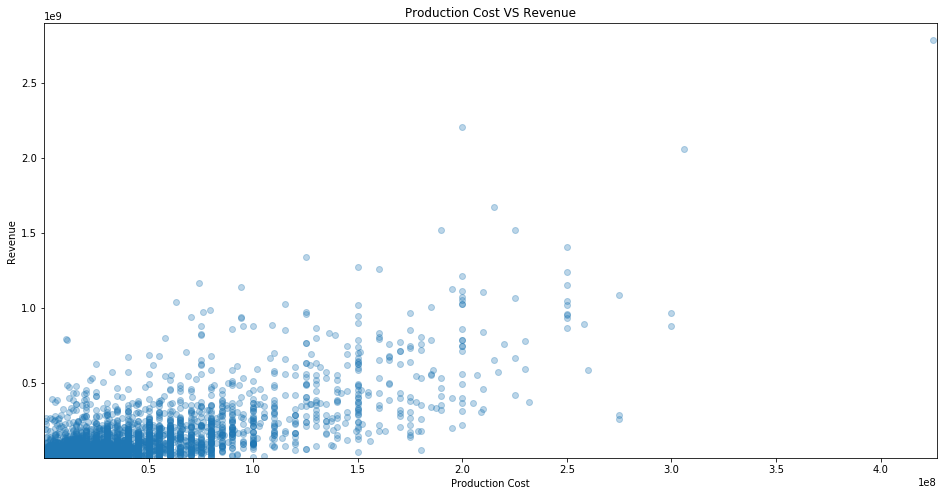

In [21]:
fig = plt.figure(figsize=(16,8))
plt.scatter(x,y,alpha=0.3)
plt.title('Production Cost VS Revenue')
plt.xlim(1.2e+03,4.27e+08)
plt.xlabel('Production Cost')
plt.ylim(2.7e+01,2.9e+09)
plt.ylabel('Revenue')

In [22]:
from sklearn.linear_model import LinearRegression as LR

In [23]:
regeression = LR()
regeression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#coefficient
regeression.coef_

array([[3.11150918]])

In [25]:
#intercept
regeression.intercept_

array([-7236192.72913942])

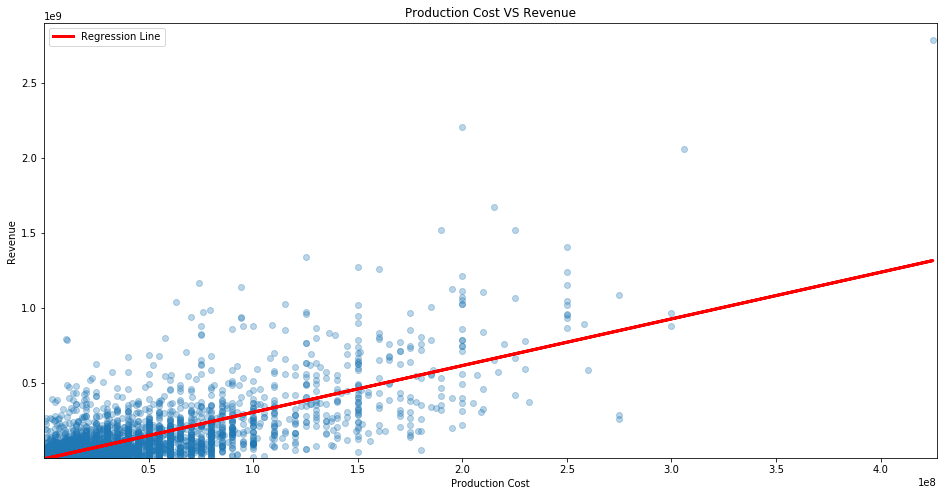

In [26]:
fig = plt.figure(figsize=(16,8))
plt.scatter(x,y,alpha=0.3)
plt.plot(x,regeression.predict(x),lw=3,color='red',label = 'Regression Line')
plt.title('Production Cost VS Revenue')
plt.xlim(1.2e+03,4.27e+08)
plt.xlabel('Production Cost')
plt.ylim(2.7e+01,2.9e+09)
plt.ylabel('Revenue')
plt.legend(loc='upper left')

In [27]:
#check goodness of fit by r_squared
regeression.score(x,y)

0.5496485356985729